correlation_matrix : 
 CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
PRICE      1.000000
Name: PRICE, dtype: float64
The best attribute with the highest correlation with the PRICE : PRICE

Analytical solution :

beta 0 : 22.112541254125414
beta 1 : 2.743679870756823e-15
SSE : 3766919.597054973
SST : 18333.486798029557
R2 : -204.4666217372155

Gradient Descent :

beta0 :  22.112541254125407
beta1 :  -5.076980273665129e-16
SSE :  3766919.597054973
R2 :  -204.4666217372155


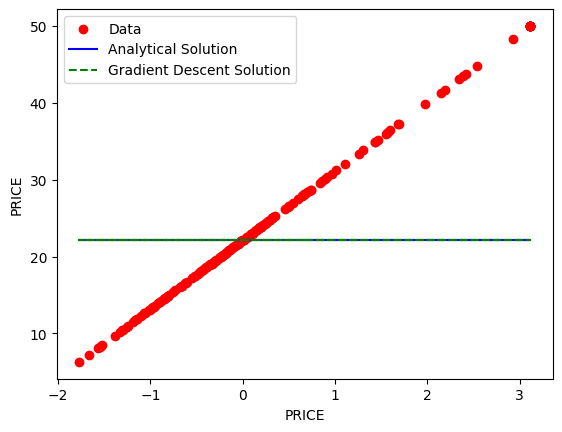

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

data_link="http://lib.stat.cmu.edu/datasets/boston"
raw_df=pd.read_csv(data_link,sep='\s+',skiprows=22,header=None)
data=np.hstack([raw_df.values[::2,:],raw_df.values[1::2,:2]]);
target=raw_df.values[1::2,2]
data_frame=pd.DataFrame(data=data,columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'])
data_frame['PRICE']=target

correlation_matrix=data_frame.corr()
print("correlation_matrix : \n",correlation_matrix['PRICE'])
best_element=correlation_matrix['PRICE'].idxmax(axis=0)
print("The best attribute with the highest correlation with the PRICE :",best_element)

x=data_frame[[best_element]].values
y=data_frame['PRICE'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=1)
scalar=StandardScaler()
x_train_scaled=scalar.fit_transform(x_train)
x_test_scaled=scalar.transform(x_test)

x_train_mean=np.mean(x_train_scaled)
y_train_mean=np.mean(y_train)
ntr=np.sum((x_train_scaled-x_train_mean)*(y_train-y_train_mean))
dtr=np.sum((x_train_scaled-x_train_mean)**2)

beta1=ntr/dtr
beta0=y_train_mean-beta1*x_train_mean
y_pred=beta0+beta1*x_test_scaled
SSE=np.sum((y_test-y_pred)**2)
SST=np.sum((y_test-np.mean(y_test))**2)
R2=1-SSE/SST
print("Analytical solution :")
print("\nbeta 0 :",beta0)
print("beta 1 :",beta1)
print("SSE :",SSE)
print("SST :",SST)
print("R2 :",R2)

beta0_gd=0
beta1_gd=0
learning_rate=0.001
itrations=1000
n=len(x_train)
for i in range(itrations):
  y_pred_gd=beta0_gd+beta1_gd*x_train_scaled
  error=y_pred_gd-y_train
  beta0_gd-=learning_rate*(1/n)*np.sum(error)
  beta1_gd-=learning_rate*(1/n)*np.sum(error*x_train_scaled)
y_pred_gd_test=beta0_gd+beta1_gd*x_test_scaled
SSE_gd=np.sum((y_test-y_pred_gd_test)**2)
R2_gd=1-SSE_gd/SST

print("Gradient Descent :")
print("\nbeta0 : ",beta0_gd)
print("beta1 : ",beta1_gd)
print("SSE : ",SSE_gd)
print("R2 : ",R2_gd)

plt.scatter(x_test_scaled,y_test,color="red",label="Data")
plt.plot(x_test_scaled,y_pred,color='blue',label="Analytical Solution")
plt.plot(x_test_scaled,y_pred_gd_test,color="green",linestyle="--",label="Gradient Descent Solution")
plt.xlabel(max_element)
plt.ylabel("PRICE")
plt.legend()
plt.show()